<a href="https://colab.research.google.com/github/taliafabs/sta365-winter2025/blob/main/sta365hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA365 Applied Bayesian Statistics Homework 2

January 22, 2025

---


## Question 1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for } \theta =\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

- step by step evolution of posterior

two things are happening:
1. prior is changed -- it is now a binomial likelihood and a discrete uniform prior.
getting assigned to the p in the prior
density is 1/101
p is the parameter going into data model
we put prior over it over the p parameter going into the data model
this time we arent doing the math on paper, we are doing element-wise multiplication machinery
liklihood (binomial), discrete uniform prior, element-wise multiplication to produce posterior
prior is a vector of discrete points with equal probability
prior would look like a flat blue line, draw it as 101 points, equal probability on each possible value
should have 10 posterior plots

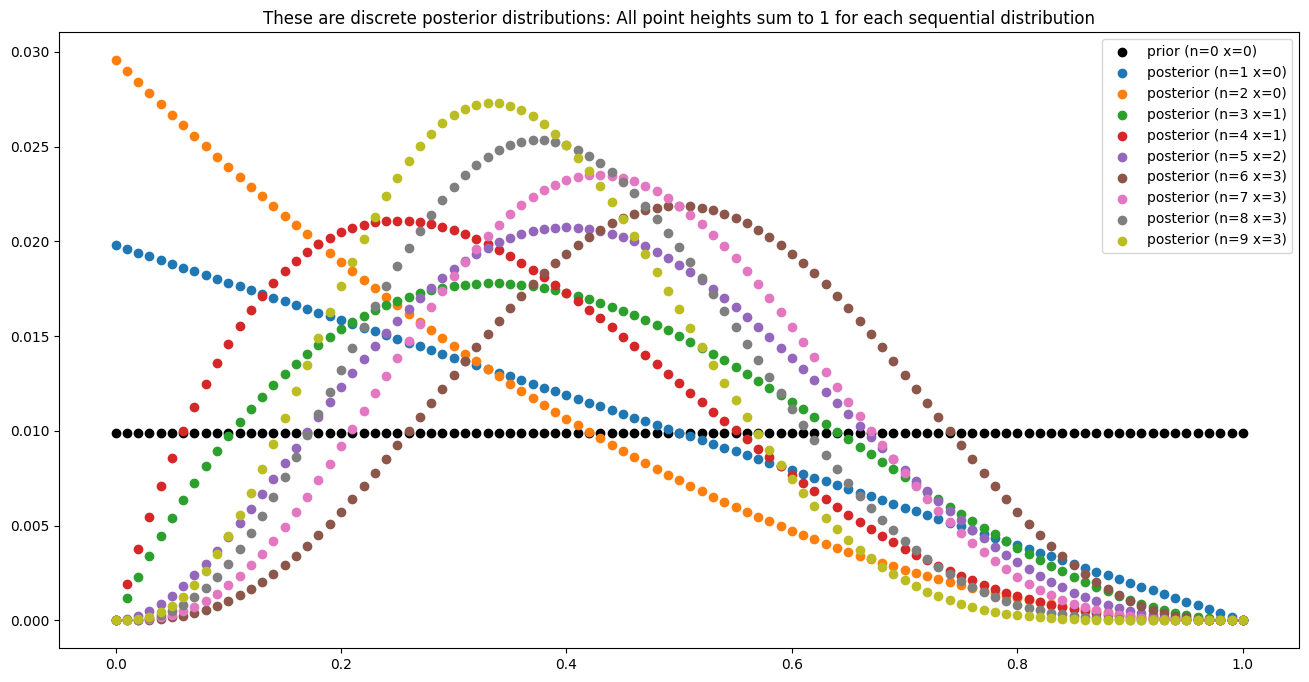

In [ ]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101)
# start with the base prior
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    # use these for batch updates based on a binomial distribution
    # or do updates in a truly sequential manner using Bernoulli
    # prior = posterior  # for each Bernoulli observation update
    # update posterior and show it, add 1 data point each time
    n += 1
    x += observation

    # binomial likelihood
    likelihood = stats.binom.pmf(k=x, n=n, p=parameter_domain)
    # start w base prior
    # moment data is added, prior becomes posterior
    # update posterior. posterior is prior element wise * likelihood
    posterior = prior * likelihood
    # normalize posterior
    posterior = posterior / np.sum(posterior)
    # update prior
    prior = posterior
    # plot it
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

## Question 2
Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   This is a beta distribution, $Beta(\alpha_j + x_j, \beta_j - x_j + n_j)$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

The posterior is the beta distribution, $Beta(\alpha_j + x_j, \beta_j - x_j + n_j)$
   

#### Code for Bayesian multi-armed bandit

In [ ]:
# # q2: code for the bayesian multi arm bandit
# # posteriors follow the beta distribution
# import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import random; import pandas as pd

# np.random.seed(122)

# # Initialize the parameters

# # uninformative beta distribution hyper parameters
# alpha1, beta1 = 1, 1
# alpha2, beta2 = 1, 1

# # num trials & num successes
# n1, n2 = 0, 0  # total num trials
# x1, x2 = 0, 0 # total num successes

# learning_results = []

# m = 100 # total number of iterations
# sample_size = 1000

# for t in range(m):
#   # flip a coin with success probability theta_true1 or theta_true2 where chance of flipping based on
#   # theta2_true is the probability that theta_1 < theta_2 given n, x
#   if np.random.rand() < theta_true1:
#     r = 1
#     n1 += 1
#     x1 += r
#   else:
#     r = 0
#     n2 += 1
#     x2 += r

In [72]:
# question 2
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import random; import pandas as pd

np.random.seed(123)

# go back to beta prior
# flipping one of two coins
# same sequential process
# use status of each one to decide which to run
# update counts
# update hyperparameters
# @np.vectorize
# def flip_coin(theta_true):
#   return np.random.rand() < theta_true

# the probabilities of success
theta_true1 = 0.4
theta_true2 = 0.6

# beta distribution hyperparameters
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

# running counts for total trials and total successes
n1, n2 = 0, 0 # num total trials
x1, x2 = 0, 0 # num successes

m = 500 # num iterations
sample_size = 1000 # sample size
cumulative = []
learning_results = []
posterior_means1 = []
posterior_means2 = []

# iterate time using t in range(m)
for t in range(m):
  # sample
  theta_hat1 = np.random.beta(alpha1 + x1, beta1 - x1 + n1, size=sample_size) # coin 1
  theta_hat2 = np.random.beta(alpha2 + x2, beta2 - x2 + n2, size=sample_size) # coin 2

  # estimate prob that theta_hat1 < theta_hat2
  pr = np.mean(theta_hat1 < theta_hat2)

  # select which coin to flip and flip the chosen coin
  if np.random.binomial(1, pr, 1) == 1: # coin 1
    # r = np.random.rand() < theta_true1 # success or fail
    r = np.random.binomial(1, theta_true1, 1) == 1 # determine success or fail
    # update n1 and x1 as appropriate
    n1 += 1
    x1 += r
    # update alpha1, beta1
    alpha1 += r
    beta1 += 1 - r

  else: # coin 2
    # r = np.random.rand() < theta_true2
    r = np.random.binomial(1, theta_true2, 1) == 1 # determine success or fail
    # update n2 and x2 is appropriate
    n2 += 1
    x2 += r
    # update alpha2, beta2
    alpha2 += r
    beta2 += 1 - r

  # store the results
  learning_results.append({
      "iteration": t,
      "theta_hat1": theta_hat1,
      "theta_hat2": theta_hat2,
      "n1": n1,
      "x1": x1,
      "n2": n2,
      "x2": x2,
      "pr": pr,
      "alpha1": alpha1,
      "beta1": beta1,
      "alpha2": alpha2,
      "beta2": beta2
  })

  # posterior means
  posterior_means1.append(alpha1 / (alpha1 + beta1))  # Posterior mean for Coin 1
  posterior_means2.append(alpha2 / (alpha2 + beta2))
  #   posterior_means2.append(alpha2 / (alpha2 + beta2))
  # else:
  # posterior_means2.append(((alpha2 / (alpha2 + beta2)).item()))  # Posterior mean for Coin 2

results = pd.DataFrame(learning_results)

In [68]:
print(posterior_means2[:10])  # Print the first 10 values to check if they are scalars


[0.5, array([0.33333333]), array([0.25]), array([0.4]), array([0.5]), array([0.57142857]), array([0.625]), array([0.66666667]), array([0.7]), array([0.63636364])]


#### Visualizations demonstrating the algorithm's learning process

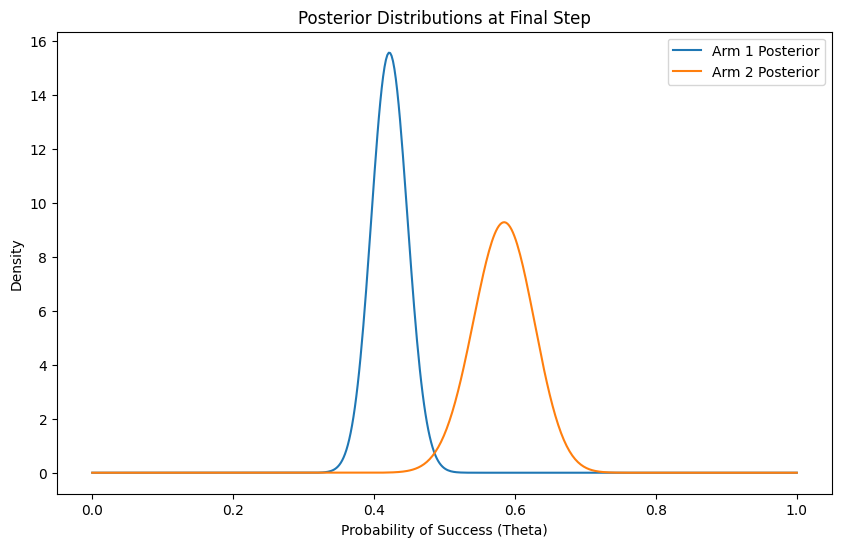

In [ ]:
# Posterior Distribution
t_values = np.linspace(0, 1, 500)
plt.figure(figsize=(10, 6))
plt.plot(t_values, stats.beta.pdf(t_values, alpha1, beta1), label="Arm 1 Posterior")
plt.plot(t_values, stats.beta.pdf(t_values, alpha2, beta2), label="Arm 2 Posterior")
plt.title("Posterior Distributions at Final Step")
plt.xlabel("Probability of Success (Theta)")
plt.ylabel("Density")
plt.legend()
plt.show()

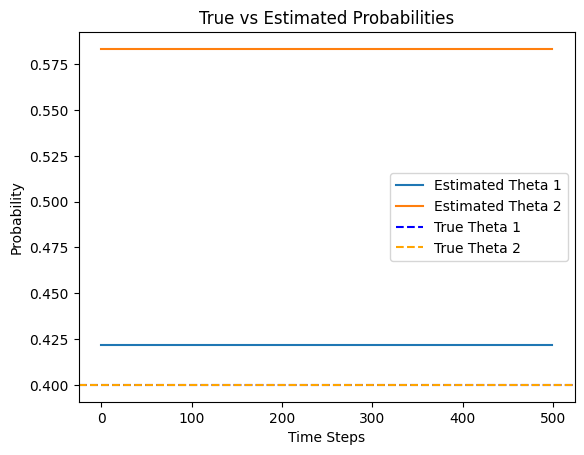

In [39]:
# True probabilities vs estimated probabilities
# plt.figure(figsize=(10, 6))
plt.plot(range(m), [alpha1 / (alpha1 + beta1)] * m, label="Estimated Theta 1")
plt.plot(range(m), [alpha2 / (alpha2 + beta2)] * m, label="Estimated Theta 2")
plt.axhline(theta_true1, color='blue', linestyle='--', label="True Theta 1")
plt.axhline(theta_true1, color='orange', linestyle='--', label="True Theta 2")
plt.title("True vs Estimated Probabilities")
plt.xlabel("Time Steps")
plt.ylabel("Probability")
plt.legend()
plt.show()

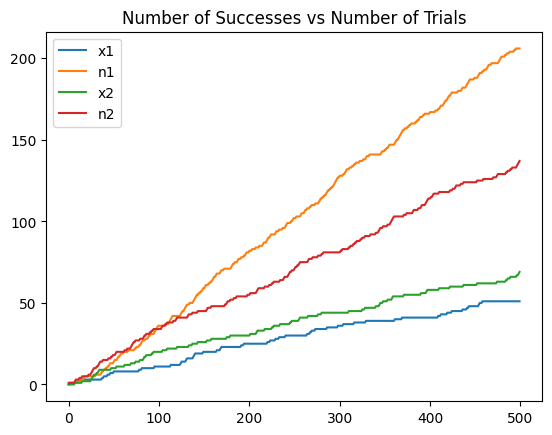

In [ ]:
# Successes vs num trials
plt.plot(results.iteration, results.x1, label="x1")
plt.plot(results.iteration, results.n1, label="n1")
plt.plot(results.iteration, results.x2, label="x2")
plt.plot(results.iteration, results.n2, label="n2")
plt.title("Number of Successes vs Number of Trials")
plt.legend()

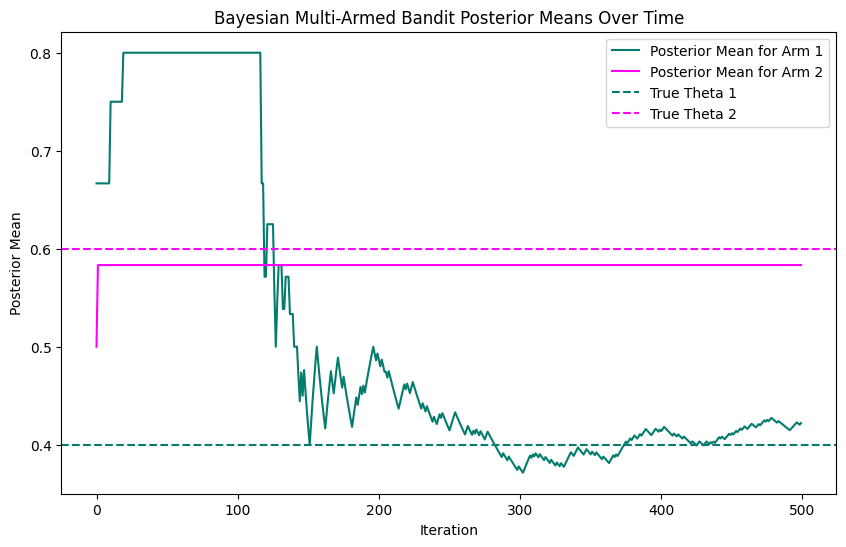

In [75]:
# posterior means
plt.figure(figsize=(10, 6))
plt.plot(posterior_means1, label="Posterior Mean for Arm 1", color="#037c6e")
# plt.plot(posterior_means2, label="Posterior Mean for Arm 2", color="magenta")
plt.plot(range(m), (results.alpha2)/(results.alpha2 + results.beta2), label="Posterior Mean for Arm 2", color = "magenta")
plt.axhline(theta_true1, color='#037c6e', linestyle='--', label="True Theta 1")
plt.axhline(theta_true2, color='magenta', linestyle='--', label="True Theta 2")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Bayesian Multi-Armed Bandit Posterior Means Over Time")
plt.legend()
plt.show()

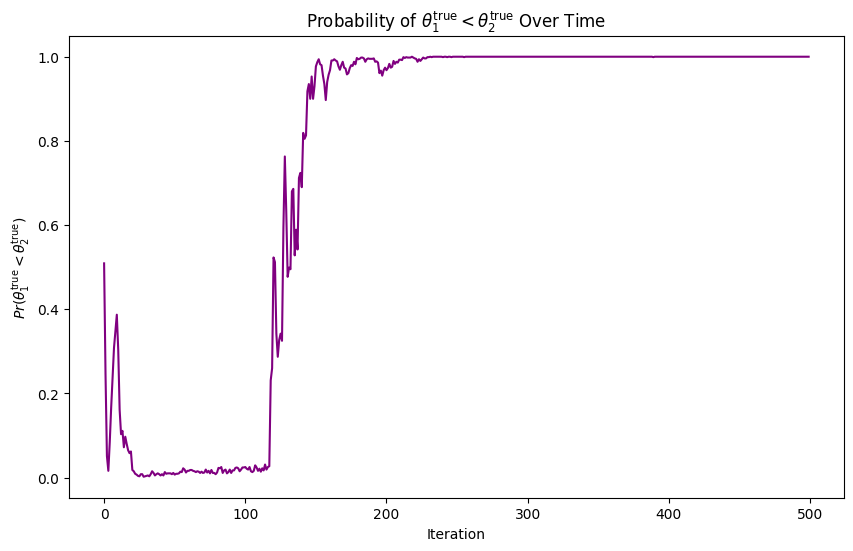

In [76]:
# pr theta1 > theta2 over time
plt.figure(figsize=(10, 6))
plt.xlabel("Iteration")
plt.ylabel("$Pr(\\theta_1^\\text{true} < \\theta_2^\\text{true})$")
plt.title("Probability of $\\theta_1^\\text{true} < \\theta_2^\\text{true}$ Over Time")
plt.plot(results.iteration, results.pr, color="purple")


## Question 3
Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:

Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above

Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

Discuss which of the two approaches you think is most appropriate and describe an actual real world AB testing context where you could deploy this Bayesian multi-armed bandit to effectively balancing the exploration-exploitation tradeoff in that setting.

#### Analysis 1

In [11]:
# Beta binomial model, independent analysis

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import random

np.random.seed(123)

theta_true1 = 0.35
theta_true2 = 0.7
theta_true3 = 0.5

# beta distribution hyperparameters
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1
alpha3, beta3 = 1, 1

# set nj = xj = 0
n1, n2, n3 = 0, 0, 0 # num total trials counter
x1, x2, x3 = 0, 0, 0 # num successes counter

# set m, total time to iterate over
m = 500
cumulative = []
coin_tracker = []
sample_size = 1000

analysis_record1 = []

# iterate time using t in range(m)
for t in range(m):
  # set the theta_hats before flipping the coin
  theta_hat1 = np.random.beta(alpha1 + x1, beta1 - x1 + n1) # coin 1
  theta_hat2 = np.random.beta(alpha2 + x2, beta2 - x2 + n2) # coin 2
  theta_hat3 = np.random.beta(alpha3 + x3, beta3 - x3 + n3) # coin 3

  pr12 = np.mean(theta_hat1 < theta_hat2)
  pr23 = np.mean(theta_hat2 < theta_hat3)
  pr13 = np.mean(theta_hat1 < theta_hat3)

  # select which coin to flip
  if pr12 >= max(pr12, pr23, pr13):
    coin = 1

  # elif theta_hat2 > theta_hat1 and theta_hat2 > theta_hat3:
  elif pr23 >= max(pr12, pr23, pr13):
    coin = 2

  else:
    coin = 3

  # flip the chosen coin
  if coin == 1:
    r = np.random.rand() < theta_true1
    # update n1 and x1 as appropriate
    n1 += 1
    x1 += r
    # update alpha1, beta1
    alpha1 += r
    beta1 += 1 - r

  elif coin == 2:
    r = np.random.rand() < theta_true2
    # update n2 and x2 is appropriate
    n2 += 1
    x2 += r
    # update alpha2, beta2
    alpha2 += r
    beta2 += 1 - r

  else:
    r = np.random.rand() < theta_true3
    # update n3 and x3 is appropriate
    n3 += 1
    x3 += r
    # update alpha3, beta3
    alpha3 += r


  cumulative.append(sum([x1, x2, x3]))
  coin_tracker.append(coin)
  analysis_record1.append({
      "iteration": t,
      "theta_hat1": theta_hat1,
      "theta_hat2": theta_hat2,
      "theta_hat3": theta_hat3,
      "x1": x1,
      "x2": x2,
      "x3": x3,
      "n1": n1,
      "n2": n2,
      "n3": n3
  })

analysis_record1 = pd.DataFrame(analysis_record1)

#### Analysis 2

In [3]:
# data for all entities is analyzed together using a single dirichlet-multinomial model
# dirichlet idea from homework 1
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import random; import pandas as pd

random.seed(123)
alpha = np.array([1, 1, 1])
# alpha1, alpha2, alpha3 = 1, 1, 1
# beta1, beta2, beta3 = 1, 1, 1

# true probabilities of success
# in this single multinomial, the true probabilities must add up to 1
theta_true1, theta_true2, theta_true3 = 0.2, 0.5, 0.3
theta_true = np.array([theta_true1, theta_true2, theta_true3])

# set nj = xj = 0
x = np.array([0, 0, 0])
n = np.array([0, 0, 0])
x1, x2, x3 = 0, 0, 0 # num successes counter
n1, n2, n3 = 0, 0, 0 # num total trials counter

m = 500 # num iterations
s = 10000 # num samples
learning_record = []

for t in range(m):
  posterior = alpha + np.array([x1, x2, x3])
  theta_hat = np.random.dirichlet(posterior)
  theta_hat1, theta_hat2, theta_hat3 = theta_hat[0], theta_hat[1], theta_hat[2]

  # choose which coin to flip
  coin = np.random.multinomial(1, np.array([theta_hat1, theta_hat2, theta_hat3]), 1).argmax()
  r = np.random.rand() < theta_true[coin - 1]
  n[coin - 1] += 1
  x[coin - 1] += r
  alpha[coin - 1] += r

  learning_record.append({
      "iteration": t,
      "theta_hat1": theta_hat1,
      "theta_hat2": theta_hat2,
      "theta_hat3": theta_hat3,
      "coin": coin,
      "x1": x[0],
      "x2": x[1],
      "x3": x[2],
      "n1": n[0],
      "n2": n[1],
      "n3": n[2]
  })

results_analysis2 = pd.DataFrame(learning_record)

Text(0.5, 1.0, 'Theta Hat Values Over Time')

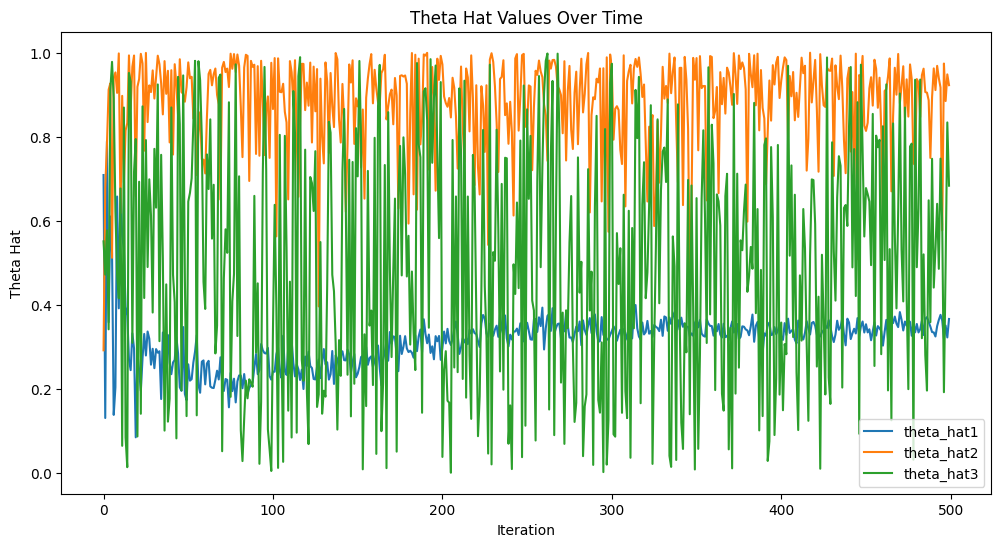

In [18]:
parameter_domain = np.linspace(0,1,101)
# plt.subplot(1, 2, 1)
plt.figure(figsize=(12, 6))
plt.plot(range(m), analysis_record1.theta_hat1, label="theta_hat1")
plt.plot(analysis_record1.iteration, analysis_record1.theta_hat2, label="theta_hat2")
plt.plot(analysis_record1.iteration, analysis_record1.theta_hat3, label="theta_hat3")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Theta Hat")
plt.title("Theta Hat Values Over Time")

#### Discussion

I believe that the more appropriate analysis approach
Analysis 1 does more exploration (prioritizes learning more), analysis 2 more exploitation (prioritizes making the most of what the algorithm already knows).

Analysis 1 uses three separate beta-binomial models. It is similar to question 2, except there are 3 coins with different probabilities of success instead of 2. This approach assumes that each coin needs to be explored independently, therefore the results of flipping one coin don't affect the others.

## Scratch cells
Scratch cells that I used for rough work. Commented out. Just here for my own reference/notes


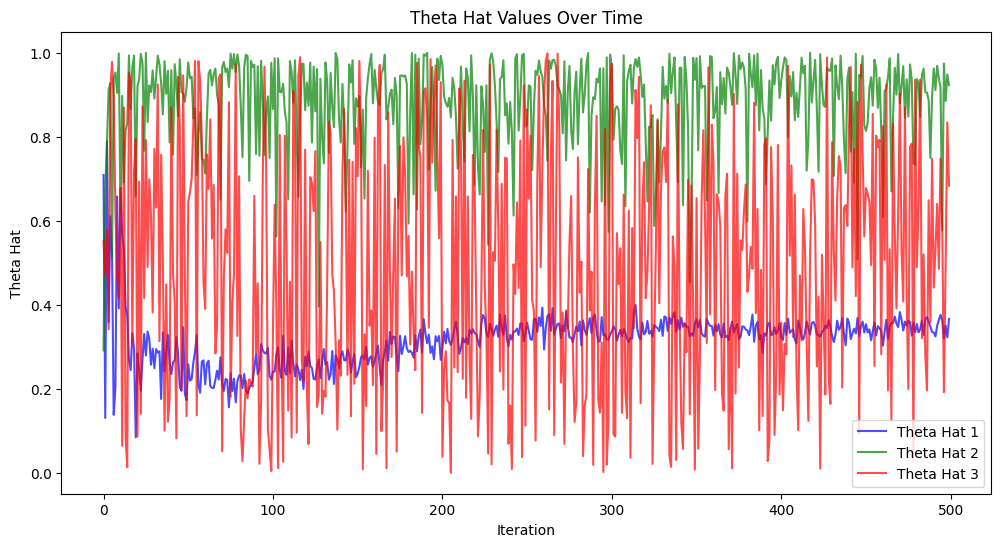

In [10]:
# Q3 rough work
# i made this more concise
  # if coin == 1:
  #   r = np.random.rand() < theta_true1
  #   n1 += 1
  #   x1 += r
  #   alpha[0] += r

  # elif coin == 2:
  #   r = np.random.rand() < theta_true2
  #   n2 += 1
  #   x2 += r
  #   alpha[1] += r

  # else:
  #   r = np.random.rand() < theta_true3
  #   n3 += 1
  #   x3 += r
  #   alpha[2] += r
# theta_hat1_values = [record["theta_hat1"] for record in analysis_record1]
# theta_hat2_values = [record["theta_hat2"] for record in analysis_record1]
# theta_hat3_values = [record["theta_hat3"] for record in analysis_record1]

# # Plot the theta_hats over time
# plt.figure(figsize=(12, 6))
# plt.plot(range(m), theta_hat1_values, label="Theta Hat 1", color="blue", alpha=0.7)
# plt.plot(range(m), theta_hat2_values, label="Theta Hat 2", color="green", alpha=0.7)
# plt.plot(range(m), theta_hat3_values, label="Theta Hat 3", color="red", alpha=0.7)
# plt.xlabel("Iteration")
# plt.ylabel("Theta Hat")
# plt.title("Theta Hat Values Over Time")
# plt.legend()
# plt.show()